# Rotten Tomatoes Ratings - A gathering data project

We will use read_csv to import the tsv file, read_csv pandas function can be used to read multiple types of flat files.

In [55]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import unicodedata 
%matplotlib inline

In [56]:
df_1 = pd.read_csv('bestofrt.tsv', sep = "\t")
df_1.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


## Webscraping from Rotten Tomatoes website
Webscraping means extracting data from websites using code. We will be downloading the rotten tomatoes page, which is basically a HTML file and then parse it to extract the data using Python Beautiful Soup library.

In [57]:
#import beautiful soup
from bs4 import BeautifulSoup

In [58]:
#open a html file- using et for ref here
with open("rt_html/et_the_extraterrestrial.html") as file:
    soup = BeautifulSoup(file, "lxml") #use beautiful soup constructor to open the file, lxml is the parser

In [59]:
#view the parsed html file
soup

<!DOCTYPE html>
<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script src="//cdn.optimizely.com/js/594670329.js"></script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc" name="google-site-verification"/>
<meta content="034F16304017CA7DCF45D43850915323" name="msvalidate.01"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/iphone/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/styles/css/rt_main.css" rel="stylesheet"/>
<script id="jsonLdSchema" type="application/ld+json">{"@context":"http

In [60]:
#Find method to find a certain tag
soup.find('title'),soup.find('audience_score') , soup.find('number_of_audience_ratings')

(<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>,
 None,
 None)

In [61]:
#access the contents inside the tag contents(), also slice the string and remove rotten tomattoes
soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]

'E.T. The Extra-Terrestrial\xa0(1982)'

In [62]:
#try removing \xa01982 from title
title1=soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
title1 = unicodedata.normalize("NFKD", title1)
print(title1)

E.T. The Extra-Terrestrial (1982)


In [63]:
len(' - Rotten Tomatoes')

18

<li>Creates an empty list, df_list, to which dictionaries will be appended. This list of dictionaries will eventually be converted to a pandas DataFrame (this is the most efficient way of building a DataFrame row by row).
<li>Loops through each movie's Rotten Tomatoes HTML file in the rt_html folder.
<li>Opens each HTML file and passes it into a file handle called file.
<li>Creates a DataFrame called df by converting df_list using the pd.DataFrame constructor.
<p>The task here is to extract the title, audience score, and number of audience ratings in each HTML file so each trio can be appended as a dictionary to df_list.</p>

In [70]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        # Your code here
        soup = BeautifulSoup(file, "lxml")
        
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        #try removing \xa01982 from title
        title = unicodedata.normalize("NFKD", title)
        audience_score = soup.find('div', class_='audience-score meter').find('span').contents[0][:-1]
        #extract the div tag that has user ratings and then remove the commas
        num_audience_ratings=soup.find('div',class_='audience-info hidden-xs superPageFontColor')
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',','')
        
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
       
        # Note: a correct implementation may take ~15 seconds to run
        df = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])       
        

In [71]:
df.head()


,title,audience_score,number_of_audience_ratings
0,Zootopia (2016),92,98633
1,The Treasure of the Sierra Madre (1948),93,25627
2,All Quiet on the Western Front (1930),89,17768
3,Rear Window (1954),95,149458
4,Selma (2015),86,60533


## Merge df and df_1

In [72]:
df.shape, df_1.shape

((100, 3), (100, 4))

In [77]:
# do a left join on the main dataset df_1 on title
df_combined= pd.merge(df,df_1, how='left', on='title') 
df_combined.head()

,title,audience_score,number_of_audience_ratings,ranking,critic_score,number_of_critic_ratings
0,Zootopia (2016),92,98633,44.0,98.0,249.0
1,The Treasure of the Sierra Madre (1948),93,25627,51.0,100.0,45.0
2,All Quiet on the Western Front (1930),89,17768,56.0,100.0,40.0
3,Rear Window (1954),95,149458,36.0,100.0,63.0
4,Selma (2015),86,60533,37.0,99.0,236.0


In [78]:
df_combined.shape

(100, 6)

In [85]:
#Look at the combined dataset as a whole
df_combined.describe()

,audience_score,number_of_audience_ratings,ranking,critic_score,number_of_critic_ratings
count,100.000000,1.000000e+02,97.000000,97.000000,97.000000
mean,89.680000,8.381505e+05,50.268041,97.917526,142.329897
std,5.314132,4.604139e+06,29.234154,2.182650,113.028455
min,72.000000,6.128000e+03,1.000000,92.000000,40.000000
25%,87.000000,3.526425e+04,25.000000,97.000000,54.000000
50%,90.000000,6.336600e+04,50.000000,98.000000,75.000000
75%,94.000000,2.118585e+05,75.000000,100.000000,256.000000
max,98.000000,3.335567e+07,100.000000,100.000000,370.000000


## How do the ratings look like on cleaned data

In [68]:
#import the cleaned file


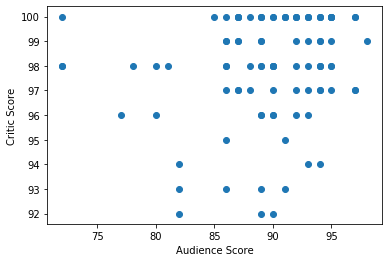

In [80]:
plt.scatter(df_combined.audience_score, df_combined.critic_score);
plt.xlabel('Audience Score')
plt.ylabel('Critic Score');

The above chart does not make too much sense, I cannot tell which movie lands where. I'll import the data in Tableau and create an almost fancy chart.

In [83]:
#export the df_Combined dataset into a csv
df_combined.to_csv('rt_combined.csv',index=False)

Created the below visual in Tableau, it shows how movies rate Critics score vs Audience score. The gray lines represent the median ratings for each axes. 
<li>The movies in the 1st quadrant are those that are extremely high rated by the critics but low by audience. That makes sense, I never liked "The Babadook" at all. Its just a hyped movie for nothing.</li>
<li>The movies in the 2nd quadrant are the ones that are rated high on critics as well as audience's scores. The Godfather, Seven Samurai must be very nice movies, and I haven't watched any of them.</li>
<li>The movies in the 3rd quadrant are lower on both the scores.</li>
<li>The movies in the 4th quadrant are basically the popular movies. </li>

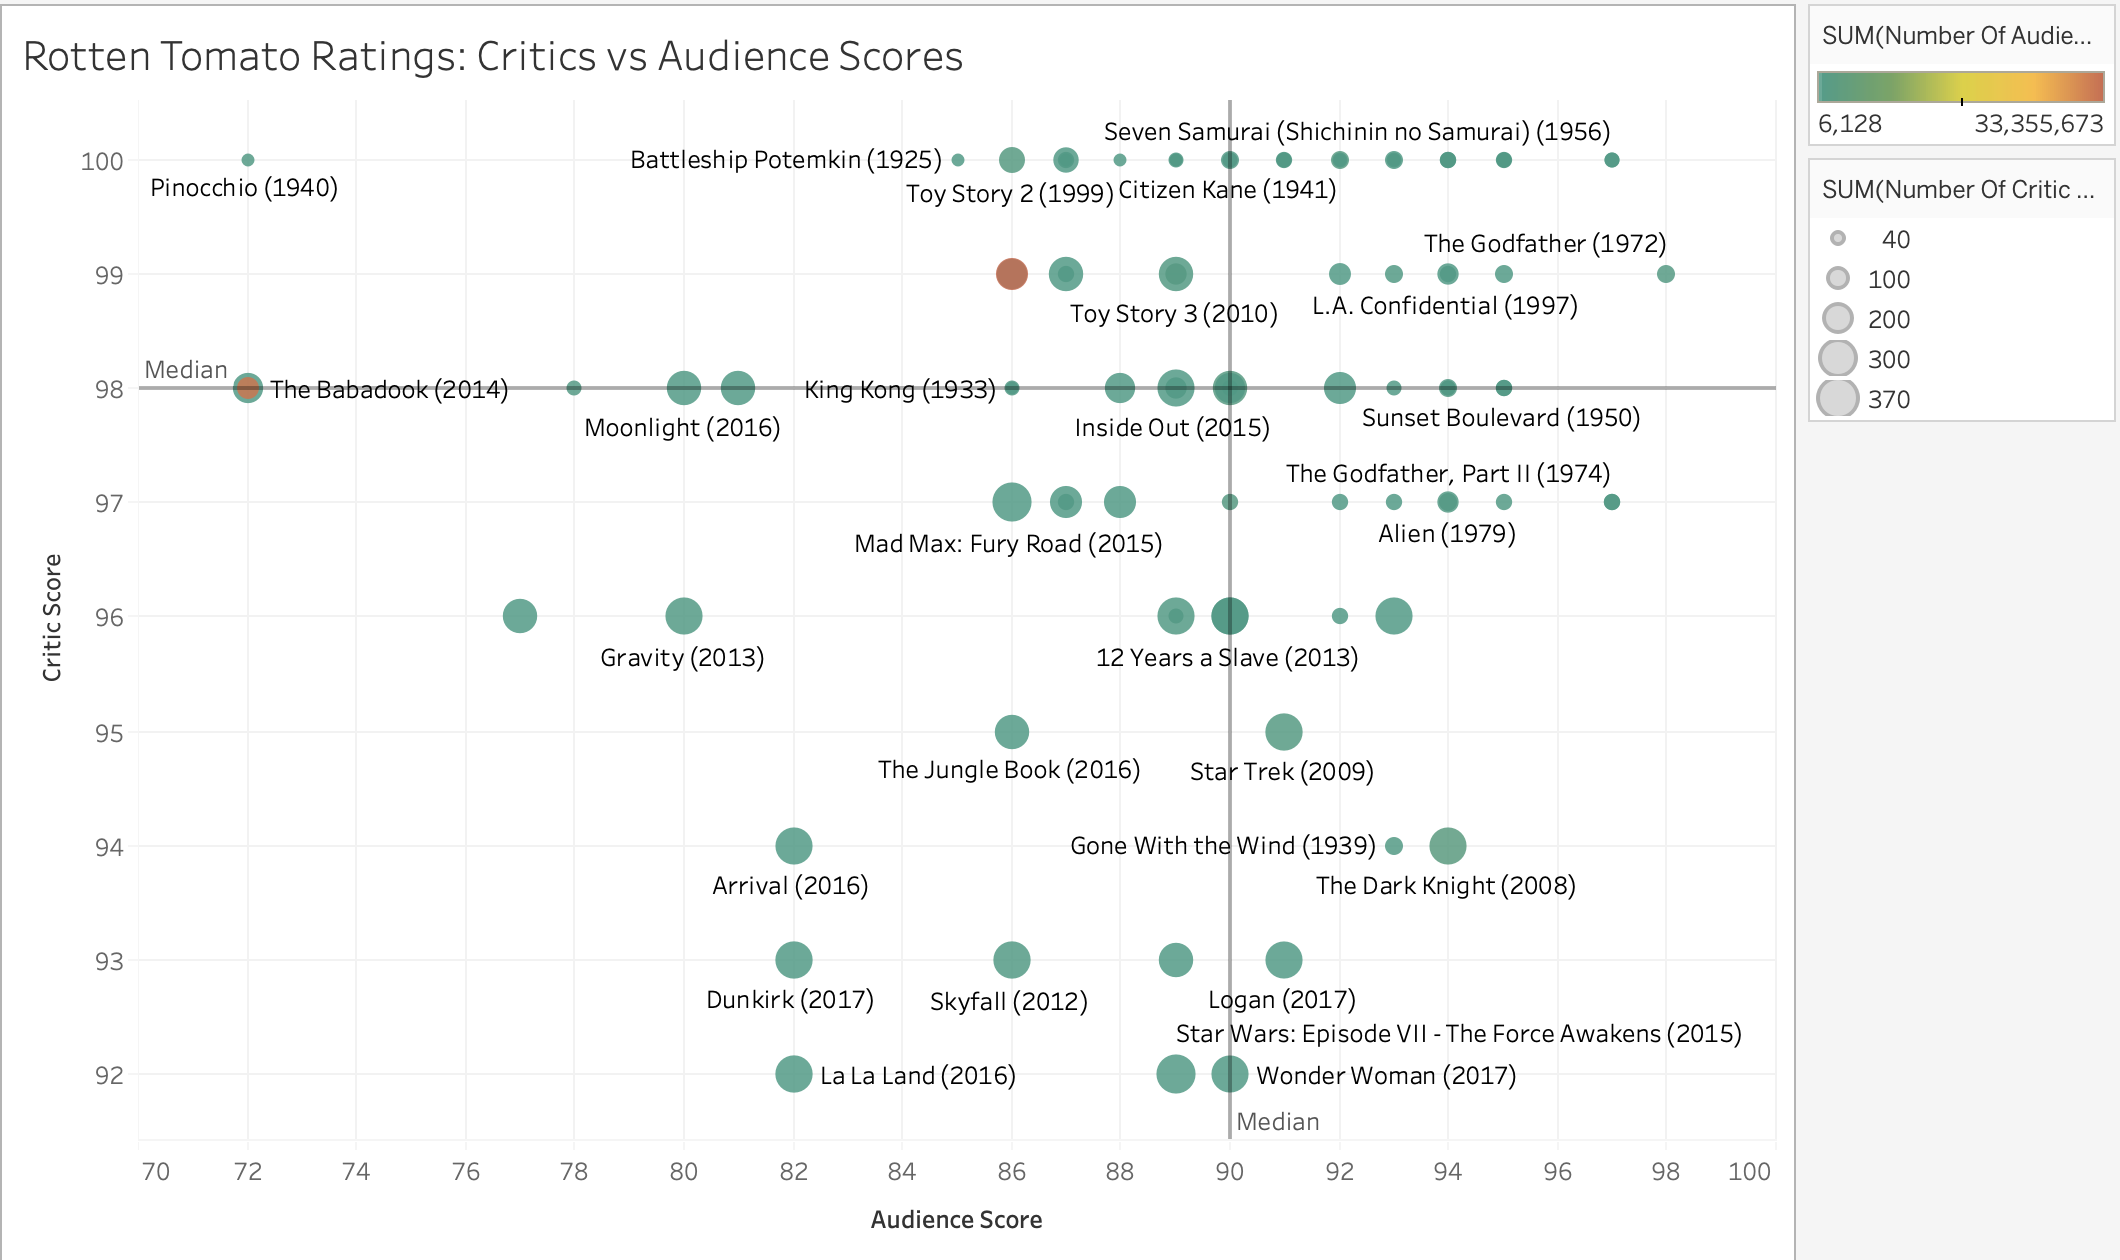